In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
df = pd.read_csv('globallandslides.csv')
df_copy = pd.read_csv('globallandslides.csv')

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
df.head()

In [ ]:
df = df[df.country_name=="India"]

In [ ]:
df.head()

In [ ]:
df["Year"] = pd.to_datetime(df["event_date"]).dt.year

In [ ]:
df = df[df.landslide_category=="landslide"]

## A map of only landslides that have happened within India

In [ ]:
import pandas as pd
import seaborn as sns
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point

sns.set_style('whitegrid')

In [ ]:
ls_df = df
ls_df = ls_df.dropna(axis=0, subset=['admin_division_name'])

In [ ]:
ls_df["admin_division_name"].replace("Nāgāland", "Nagaland",inplace = True)
ls_df["admin_division_name"].replace("Meghālaya", "Meghalaya",inplace = True)
ls_df["admin_division_name"].replace("Tamil Nādu", "Tamil Nadu",inplace = True)
ls_df["admin_division_name"].replace("Karnātaka", "Karnataka",inplace = True)
ls_df["admin_division_name"].replace("Gujarāt", "Gujarat",inplace = True)
ls_df["admin_division_name"].replace("Arunāchal Pradesh", "Arunachal Pradesh",inplace = True)


In [ ]:
state_df = ls_df["admin_division_name"].value_counts()
state_df = state_df.to_frame()
state_df.reset_index(level=0, inplace=True)
state_df.columns = ['State', 'Count']

In [ ]:
state_df

In [ ]:
state_df.at[15,"Count"] = 69
state_df.drop(7)

In [ ]:
fp = r'Maps_with_python\india-polygon.shp'
map_df = gpd.read_file(fp)
map_df_copy = gpd.read_file(fp)
map_df.head()

In [ ]:
state_df.at[0,"State"] = "Jammu and Kashmir"
state_df.at[20,"State"] = "Delhi"

In [ ]:
#Merging the data
merged = map_df.set_index('st_nm').join(state_df.set_index('State'))
merged['Count'] = merged['Count'].replace(np.nan, 0)
merged.head()

In [ ]:
#create figure and axes for Matplotlib and set the title
fig, ax = plt.subplots(1, figsize=(10, 10))
ax.axis('off')
ax.set_title('Landslides', fontdict={'fontsize': '25', 'fontweight' : '10'})

# plot the figure
merged.plot(column='Count',cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0', legend=True,markersize=[39.739192, -104.990337])

In [ ]:
assam_df = df[df['admin_division_name'] == "Assam"]
assam_df.head()

In [ ]:
lat = assam_df['latitude'].tolist()
long = assam_df['longitude'].tolist()

In [ ]:
map_df = map_df[map_df.st_nm == "Assam"]

                     geometry
0   POINT (93.16450 25.52150)
1   POINT (93.43330 24.75000)
2   POINT (93.43410 24.76250)
3   POINT (93.02800 25.15530)
4   POINT (92.85730 25.11750)
..                        ...
69  POINT (91.80200 26.19660)
70  POINT (93.14770 25.47490)
71  POINT (91.77470 26.10970)
72  POINT (91.68490 26.10010)
73  POINT (91.79860 26.16990)

[74 rows x 1 columns]


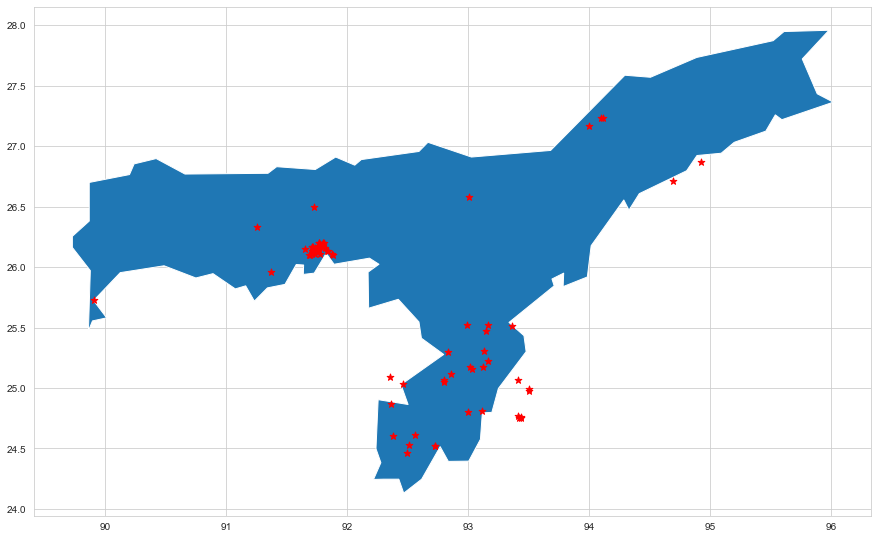

In [118]:
geometry = [Point(xy) for xy in zip(long,lat)]
fig,ax = plt.subplots(figsize = (15,15))
map_df.plot(ax = ax)
geo_df = gpd.GeoDataFrame(geometry = geometry)
print(geo_df)
g = geo_df.plot(ax = ax, markersize = 50, color = 'red',marker = '*',label = 'Assam')
plt.show()

In [ ]:
fp = r'Assam_Map_Data\assam_administrative.shp'
xyz = gpd.read_file(fp)
xyz.head()

# fp = r'Assam_Map_Data\District\assam_location.dbf'
# dis_df = gpd.read_file(fp)
# dis_df.head()
# xyz_copy = gpd.read_file(fp)

In [ ]:
dis_df = pd.read_csv('District Points.csv')

In [119]:
dis_df = dis_df[dis_df.state_code == "ASSAM"]
dis_df

,parameter,district_code,state_code,Lat,Lon
285,7,Kokrajhar,ASSAM,26.402810,90.273819
286,10,Goalpara,ASSAM,26.176465,90.631164
290,65,Nalbari,ASSAM,26.444776,91.445234
291,96,Barpeta,ASSAM,26.318438,91.012313
292,85,Kamrup,ASSAM,26.181061,91.751916
307,32,Sonitpur,ASSAM,26.623221,92.791733
308,36,Marigaon,ASSAM,26.255106,92.337553
309,40,Bongaigaon,ASSAM,26.502443,90.564968
310,6,Darrang,ASSAM,26.441811,92.033565
311,12,Nagaon,ASSAM,26.355771,92.686525


In [109]:
merged_dis = xyz.set_index('NAME').join(dis_df.set_index('district_code'))
merged_dis.head()
merged_dis = merged_dis[merged_dis.Lat.notna()]
merged_dis.head()


,ADMIN_LEVE,geometry,parameter,state_code,Lat,Lon
Cachar,5,"LINESTRING (93.25298 24.97509, 93.26324 24.966...",30.0,ASSAM,24.820025,92.795038
Dhemaji,5,"LINESTRING (95.27734 27.68539, 95.26752 27.667...",45.0,ASSAM,27.484400,94.594933
Dibrugarh,5,"LINESTRING (95.20330 27.66398, 95.22604 27.655...",81.0,ASSAM,27.480193,94.912419
Goalpara,5,"LINESTRING (90.80349 26.12357, 90.82177 26.117...",10.0,ASSAM,26.176465,90.631164
Golaghat,5,"LINESTRING (94.16775 26.35327, 94.17979 26.354...",9.0,ASSAM,26.509522,93.974001


In [110]:
merged_dis.reset_index(level=0, inplace=True)


In [111]:
merged_dis.head()

,index,ADMIN_LEVE,geometry,parameter,state_code,Lat,Lon
0,Cachar,5,"LINESTRING (93.25298 24.97509, 93.26324 24.966...",30.0,ASSAM,24.820025,92.795038
1,Dhemaji,5,"LINESTRING (95.27734 27.68539, 95.26752 27.667...",45.0,ASSAM,27.484400,94.594933
2,Dibrugarh,5,"LINESTRING (95.20330 27.66398, 95.22604 27.655...",81.0,ASSAM,27.480193,94.912419
3,Goalpara,5,"LINESTRING (90.80349 26.12357, 90.82177 26.117...",10.0,ASSAM,26.176465,90.631164
4,Golaghat,5,"LINESTRING (94.16775 26.35327, 94.17979 26.354...",9.0,ASSAM,26.509522,93.974001


In [114]:
merged_dis.columns = ['District', 'ADMIN_LEVE','geometry','parameter', 'state_code', 'Lat', 'Lon']
merged_dis.head()

,District,ADMIN_LEVE,geometry,parameter,state_code,Lat,Lon
0,Cachar,5,"LINESTRING (93.25298 24.97509, 93.26324 24.966...",30.0,ASSAM,24.820025,92.795038
1,Dhemaji,5,"LINESTRING (95.27734 27.68539, 95.26752 27.667...",45.0,ASSAM,27.484400,94.594933
2,Dibrugarh,5,"LINESTRING (95.20330 27.66398, 95.22604 27.655...",81.0,ASSAM,27.480193,94.912419
3,Goalpara,5,"LINESTRING (90.80349 26.12357, 90.82177 26.117...",10.0,ASSAM,26.176465,90.631164
4,Golaghat,5,"LINESTRING (94.16775 26.35327, 94.17979 26.354...",9.0,ASSAM,26.509522,93.974001


In [116]:
merged_dis.District[0]

'Cachar'

                     geometry
0   POINT (93.16450 25.52150)
1   POINT (93.43330 24.75000)
2   POINT (93.43410 24.76250)
3   POINT (93.02800 25.15530)
4   POINT (92.85730 25.11750)
..                        ...
69  POINT (91.80200 26.19660)
70  POINT (93.14770 25.47490)
71  POINT (91.77470 26.10970)
72  POINT (91.68490 26.10010)
73  POINT (91.79860 26.16990)

[74 rows x 1 columns]


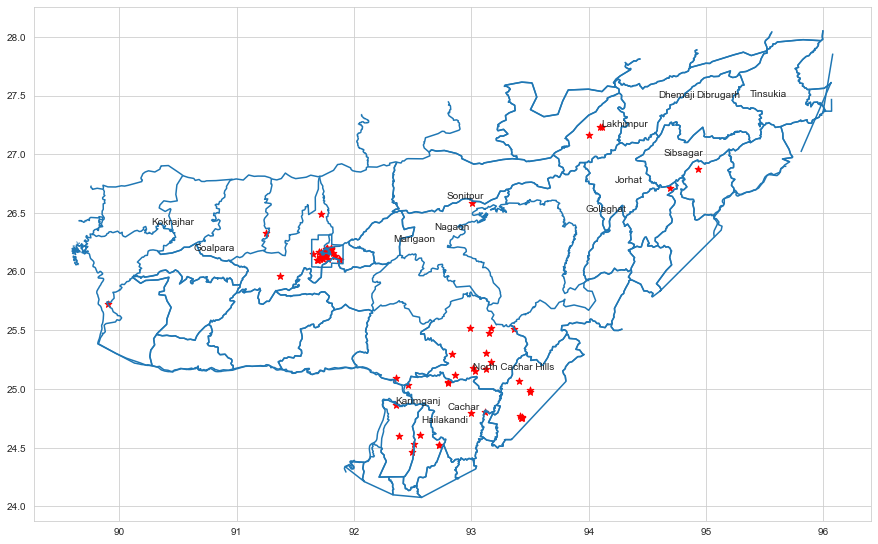

In [117]:
geometry = [Point(xy) for xy in zip(long,lat)]
fig,ax = plt.subplots(figsize = (15,15))
xyz.plot(ax = ax)
geo_df = gpd.GeoDataFrame(geometry = geometry)
print(geo_df)
g = geo_df.plot(ax = ax, markersize = 50, color = 'red',marker = '*',label = 'Assam')

for i in range(len(merged_dis)):
    plt.text(merged_dis.Lon[i],merged_dis.Lat[i],"{}".format(merged_dis.District[i]),size=10)
    
plt.show()

## A plot showing the total number of landslides that have happened in India every year

In [ ]:
y_values = df.groupby(['Year']).country_name.count().values

In [ ]:
y_values.tolist()

In [ ]:
x_values = df.groupby(['Year']).country_name.count().index.values

In [ ]:
x_values.tolist()

In [ ]:
plt.bar(x_values,y_values, color = "green")
plt.xlabel("year")
plt.ylabel("No of landslide")
plt.title("No of lanslides in India Year-wise")
plt.show()